In [66]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv(r"C:\Users\emilb\OneDrive\Desktop\iris (1).csv")

In [68]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [69]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
df.shape

(150, 5)

In [71]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [72]:
df.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [74]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Preprocessing

In [75]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [76]:
num=df.select_dtypes(include="float64")

In [77]:
num

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,NaN,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,NaN,2.0
148,6.2,3.4,5.4,2.3


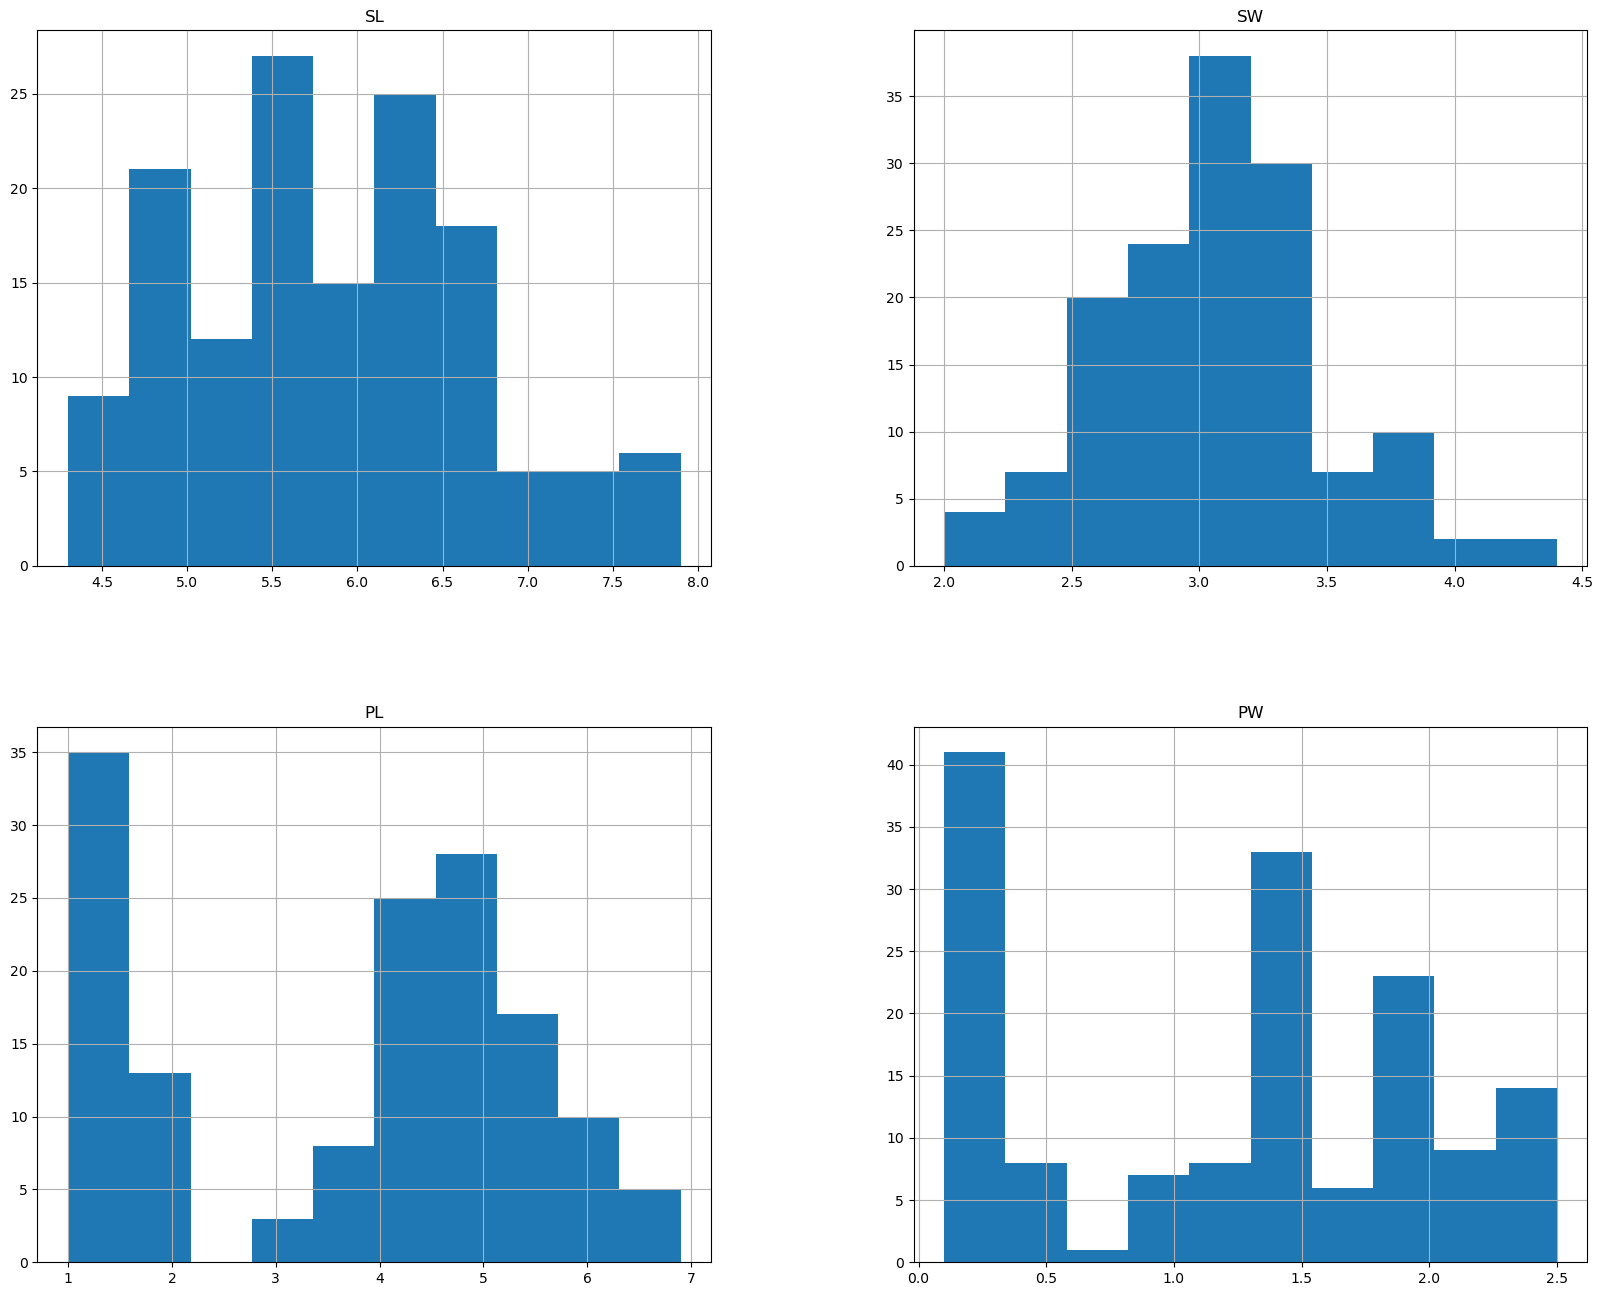

In [78]:
num.hist(figsize=[20,16])
plt.show()

In [79]:
df["SL"]=df["SL"].fillna(df["SL"].mean())

In [80]:
df["SW"]=df["SW"].fillna(df["SL"].mean())

In [81]:
df["PL"]=df["PL"].fillna(df["SL"].median())

In [82]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [83]:
df.duplicated().sum()

3

In [84]:
df = df.drop_duplicates()

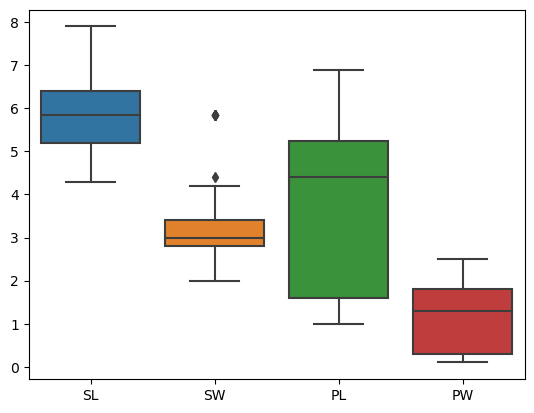

In [85]:
sns.boxplot(df)
plt.show()

In [86]:
Q1=df["SW"].quantile(0.25)
Q3=df["SW"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

#find outlires 
outliers=df[(df["SW"]<lower_bound)|(df["SW"]>upper_bound)]
outliers

,SL,SW,PL,PW,Classification
10,5.4,5.855944,1.5,0.2,Iris-setosa
15,5.7,4.400000,1.5,0.4,Iris-setosa
27,5.2,5.855944,1.5,0.2,Iris-setosa
43,5.0,5.855944,1.6,0.6,Iris-setosa
72,6.3,5.855944,4.9,1.5,Iris-versicolor
98,5.1,5.855944,3.0,1.1,Iris-versicolor
124,6.7,5.855944,5.7,2.1,Iris-virginica


In [87]:
df=df[(df["SW"]>=lower_bound)&(df["SW"]<=upper_bound)]
df.shape

(140, 5)

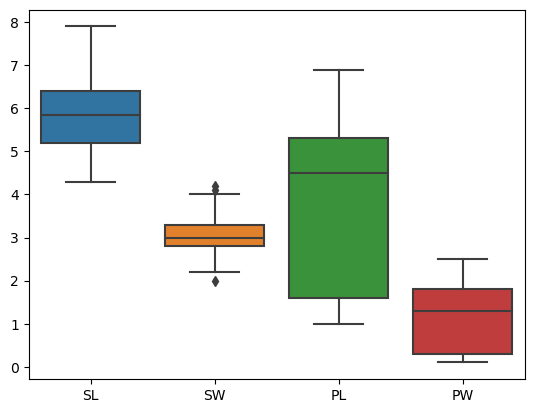

In [88]:
sns.boxplot(df)
plt.show()

In [89]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Classification"]=le.fit_transform(df["Classification"])

In [90]:
df.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [91]:
type(df)

pandas.core.frame.DataFrame

In [92]:
df=pd.DataFrame(df)
df

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.2,2.3,2
146,6.300000,2.5,5.0,1.9,2
147,6.500000,3.0,5.8,2.0,2
148,6.200000,3.4,5.4,2.3,2


In [93]:

df.columns = ['SL', 'SW', 'PL', 'PW', 'Classification']

In [94]:
df

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.2,2.3,2
146,6.300000,2.5,5.0,1.9,2
147,6.500000,3.0,5.8,2.0,2
148,6.200000,3.4,5.4,2.3,2


<Axes: >

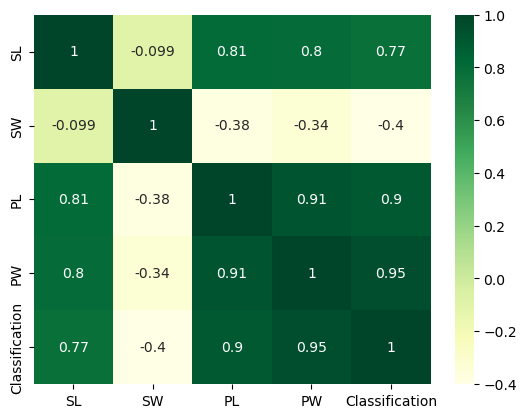

In [95]:
corr = df.corr()

# plot the heatmap
sns.heatmap(corr,annot=True,cmap="YlGn")

In [96]:
y=df["Classification"]
x=df.drop("Classification",axis=1)

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)

# Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_log_pred =lr.predict(x_test)
y_log_pred

array([2, 1, 0, 2, 0, 0, 1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 0, 0, 2, 2, 0, 2,
       1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 2, 2, 1])

In [99]:
acc_log = accuracy_score(y_test,y_log_pred)
pre_log = precision_score(y_test,y_log_pred,average='weighted')
re_log = recall_score(y_test,y_log_pred,average='weighted')
f1_log = f1_score(y_test,y_log_pred,average='weighted')

In [100]:
print('Accuracy: ',acc_log)
print('Precision: ',pre_log)
print('Recall: ',re_log)
print('F1: ',f1_log)
     

Accuracy:  0.9714285714285714
Precision:  0.9746031746031747
Recall:  0.9714285714285714
F1:  0.971776296725587


# KNN

Text(0, 0.5, 'accuracy')

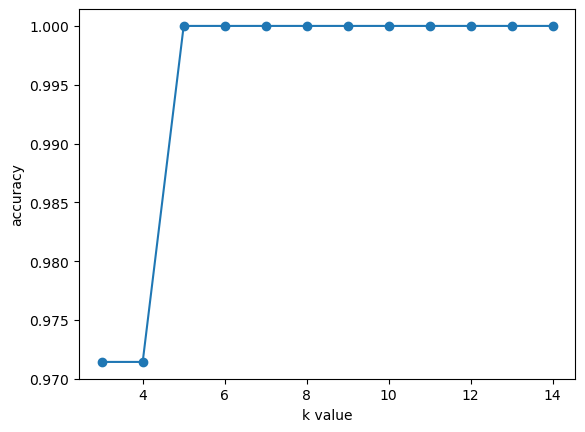

In [101]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors =np.arange(3,15)
for k in neighbors:
    k_model=KNeighborsClassifier(n_neighbors=k,metric="euclidean")
    k_model.fit(x_train,y_train)
    y_pred_knn=k_model.predict(x_test)
    acc_knn=accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc_knn)
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [102]:
knn=KNeighborsClassifier(n_neighbors=5,metric="minkowski")
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
acc_knn = accuracy_score(y_test,y_pred_knn)
pre_knn = precision_score(y_test,y_pred_knn, average='weighted')
re_knn = recall_score(y_test,y_pred_knn, average='weighted')
f1_knn = f1_score(y_test,y_pred_knn, average='weighted')

In [103]:
print('Accuracy: ',acc_knn)
print('Precision: ',pre_knn)
print('Recall: ',re_knn)
print('F1: ',f1_knn)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0


# Decision Tree model

In [104]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
acc_dt = accuracy_score(y_test,y_pred_dt)
pre_dt = precision_score(y_test,y_pred_dt, average='weighted')
re_dt = recall_score(y_test,y_pred_dt, average='weighted')
f1_dt = f1_score(y_test,y_pred_dt, average='weighted')
     

In [105]:
print('Accuracy: ',acc_dt)
print('Precision: ',pre_dt)
print('Recall: ',re_dt)
print('F1: ',f1_dt)
     

Accuracy:  0.9714285714285714
Precision:  0.9746031746031747
Recall:  0.9714285714285714
F1:  0.971776296725587


# Randanom Forest Model

In [106]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)   
acc_rf = accuracy_score(y_test,y_pred_rf)
pre_rf = precision_score(y_test,y_pred_rf, average='weighted')
re_rf = recall_score(y_test,y_pred_rf, average='weighted')
f1_rf = f1_score(y_test,y_pred_rf, average='weighted')
     

In [107]:
print('Accuracy: ',acc_rf)
print('Precision: ',pre_rf)
print('Recall: ',re_rf)
print('F1: ',f1_rf)

Accuracy:  0.9714285714285714
Precision:  0.9746031746031747
Recall:  0.9714285714285714
F1:  0.971776296725587


# SVM

In [108]:
from sklearn.svm import SVC
sv= SVC(kernel='rbf')
sv.fit(x_train,y_train)
y_pred_sv = sv.predict(x_test)
acc_sv = accuracy_score(y_test,y_pred_sv)
pre_sv = precision_score(y_test,y_pred_sv, average='weighted')
re_sv = recall_score(y_test,y_pred_sv, average='weighted')
f1_sv = f1_score(y_test,y_pred_sv, average='weighted')
     

In [109]:
print('Accuracy: ',acc_sv)
print('Precision: ',pre_sv)
print('Recall: ',re_sv)
print('F1: ',f1_sv)

Accuracy:  0.9428571428571428
Precision:  0.9542857142857143
Recall:  0.9428571428571428
F1:  0.9439909297052154


# Naive BAyers Model

In [113]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred_nb=gnb.predict(x_test)
acc_nb = accuracy_score(y_test,y_pred_nb)
pre_nb = precision_score(y_test,y_pred_nb, average='weighted')
re_nb= recall_score(y_test,y_pred_nb, average='weighted')
f1_nb = f1_score(y_test,y_pred_nb, average='weighted')
     

In [114]:
print('Accuracy: ',acc_nb)
print('Precision: ',pre_nb)
print('Recall: ',re_nb)
print('F1: ',f1_nb)

Accuracy:  0.9714285714285714
Precision:  0.9746031746031747
Recall:  0.9714285714285714
F1:  0.971776296725587


In [115]:
Accuracy = pd.DataFrame({'Models': ['Logistic Regression', 'KNN','Decision Tree', 'Random Forest','SVM_Linear', "Naive BAyers Model"],
                         'Accuracies':[acc_log,acc_knn,acc_dt,acc_rf,acc_sv,acc_nb]})


In [116]:
Accuracy

,Models,Accuracies
0,Logistic Regression,0.971429
1,KNN,1.000000
2,Decision Tree,0.971429
3,Random Forest,0.971429
4,SVM_Linear,0.942857
5,Naive BAyers Model,0.971429


from this 6 model KNN achieved 100% accuracy,Logistic Regression, Decision Tree, and Random Forest have similar accuracies (97.14%),SVM (Linear) has the lowest accuracy (94.29%)